In [1]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['lines.markeredgewidth'] = 0.5
matplotlib.rcParams['lines.markersize'] = 8 

In [2]:
import numpy as np
from numba import njit, prange, set_num_threads
from itertools import product

set_num_threads(15)

In [3]:
from ns2d import (
    EulerIntegrator,
    FiniteDifferenceDiscretizer,
    FiniteDifferenceUpwindDiscretizer,
    FiniteVolumeDiscretizer,
    GaussSeidelSolver,
    JacobiSolver,
    PredictorCorrectorIntegrator,
    RK4Integrator,
    SemiImplicitIntegrator
)

In [4]:
rhs_discretizers = [
    FiniteDifferenceDiscretizer(),
    FiniteDifferenceUpwindDiscretizer(),
    FiniteVolumeDiscretizer()
]
predictors = [
    EulerIntegrator(),
    PredictorCorrectorIntegrator,
    RK4Integrator
]
benchmarks = [
    "Taylor-Green Vortex",
    "Lid-Driven Cavity"
]
nu_values = [1e-3, 1e-5]
all_combinations = list(product(rhs_discretizers, predictors))

In [5]:
nx, ny = 41, 41
dx, dy = 2.0 / (nx - 1), 2.0 / (ny - 1)
dt = 0.001
nu = 1e-3
num_steps = 500

In [6]:
solver = JacobiSolver(
    nx=nx, ny=ny, dx=dx, dy=dy, dt=dt, nu=nu,
    integrator=EulerIntegrator(),
    discrete_navier_stokes=FiniteDifferenceDiscretizer(),
    fixed_dt=False
)
time, cfl_values, error = solver.integrate(
    num_steps=10000,
    end_time=None,
    benchmark="Taylor-Green Vortex",
    cfl_based=False,
    cfl_adapt=False,
)
vorticity = solver.compute_vorticity()
print(error)

Simulation Progress: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:59<00:00, 83.95steps/s]


0.0006445274998962969


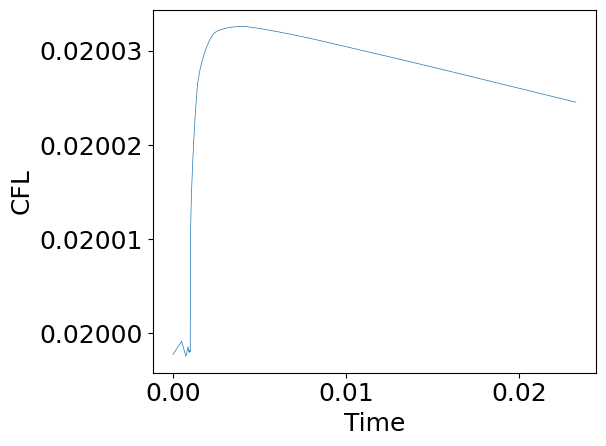

In [7]:
# plt.plot(time, error_values, label='Error in kinetic energy')
# plt.xlabel('Time')
# plt.ylabel('Error')
# plt.legend()
# plt.tight_layout()
# plt.show()

plt.plot(time, cfl_values)
plt.xlabel('Time')
plt.ylabel('CFL')
plt.tight_layout()
plt.show()

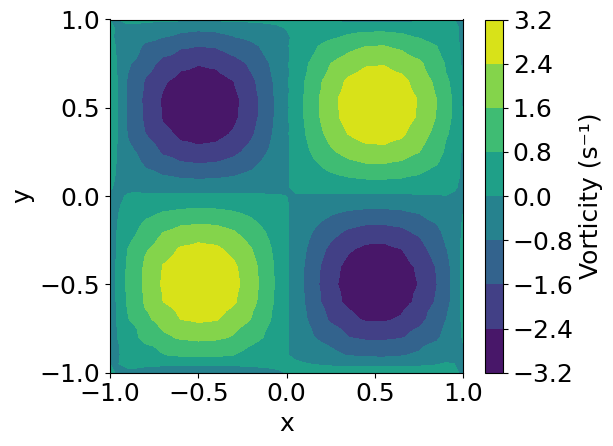

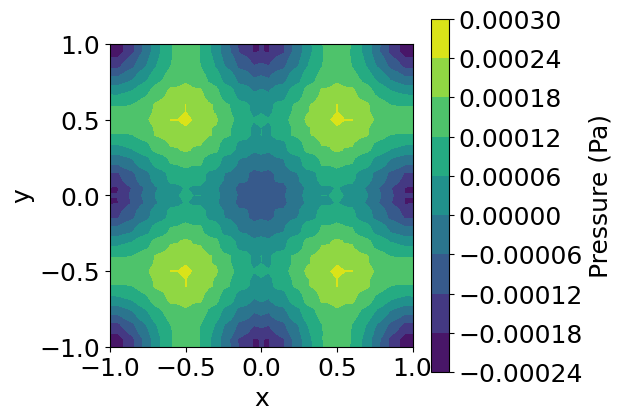

In [8]:
cf = plt.contourf(solver.X, solver.Y, vorticity)
cb = plt.colorbar(cf)
cb.set_label('Vorticity (s⁻¹)')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

cf = plt.contourf(solver.X, solver.Y, solver.p)
cb = plt.colorbar(cf)
cb.set_label('Pressure (Pa)')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Results for Jacobi Solver

At this point (and for other solver as well) use a cluster, run all simulations, collect results including final error and total compute time and some visuals like vorticity. Save everything in correct format (mostly csv, unless all in JSON) in the folder `./output/`. For images use `./img/`, and save in vector format (pdf, eps or svg). See how the time steps and viscosity affect the results. Don't run all possible configurations.

In [9]:
# for discretizer, predictor in combinations:
#     rhs_name = discretizer.__class__.__name__
#     lhs_name = predictor.__class__.__name__
    
#     print(f"\nTesting combination:")
#     print(f" - Discretizer: {rhs_name}")
#     print(f" - Predictor: {lhs_name}")

#     # Run for both benchmarks
#     try:
#         # Run actual simulation
#         # ...
        
#         # Print or store the result
#         # results[(rhs_name, lhs_name)] = result
        
#     except Exception as e:
#         print(f"Error occurred: {e}")

# Results for Gauss-Seidel Solver